Source: https://www.geeksforgeeks.org/implementing-pca-in-python-with-scikit-learn/

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from os.path import exists
from os import mkdir
import kaggle

In [22]:
# Make sure datasets directory exists
if not exists('../datasets'):
    mkdir('../datasets')

# Download dataset
dataset_path = '../datasets/ocean_personality'
if not exists(dataset_path):
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files('tunguz/big-five-personality-test', '../datasets/ocean_personality', unzip=True)

In [23]:
# Load dataset (https://www.kaggle.com/tunguz/big-five-personality-test)
df = pd.read_csv(dataset_path + '/IPIP-FFM-data-8Nov2018/data-final.csv', sep='\t')

# Drop columns with string values
df = df.drop(labels={'dateload', 'screenw', 'screenh', 'introelapse', 'testelapse', 'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err', 'long_appx_lots_of_err',
        'EXT1_E', 'EXT2_E', 'EXT3_E',
       'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E',
       'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E',
       'EST8_E', 'EST9_E', 'EST10_E', 'AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E',
       'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E', 'AGR9_E', 'AGR10_E', 'CSN1_E',
       'CSN2_E', 'CSN3_E', 'CSN4_E', 'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E',
       'CSN9_E', 'CSN10_E', 'OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E',
       'OPN6_E', 'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E'}, axis=1)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

df.columns
df.shape


(1013558, 50)

In [24]:
# Scale data befor applying PCA
scaling = StandardScaler()

# Use fit and transform method
scaling.fit(df)
scaled_data = scaling.transform(df)

# Set the n_components=3
principal = PCA(n_components=min(df.shape))
principal.fit(scaled_data)
x = principal.transform(scaled_data)

# Check the dimensions of data after PCA
print(x.shape)

(1013558, 50)


Text(0, 0.5, 'pc2')

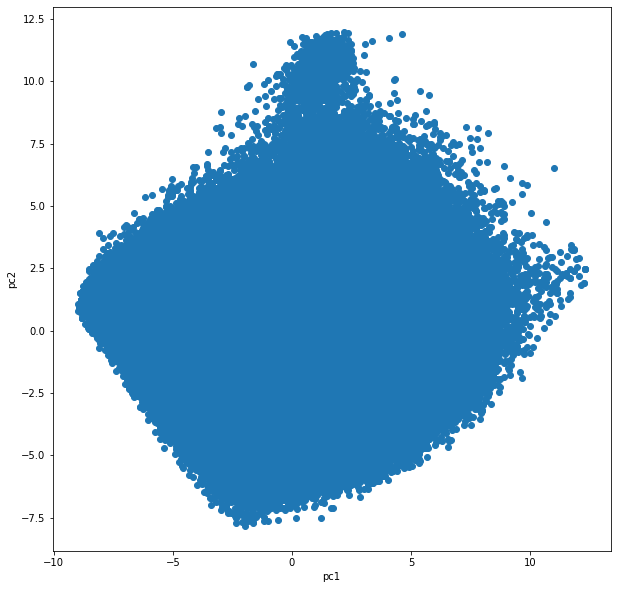

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

<BarContainer object of 50 artists>

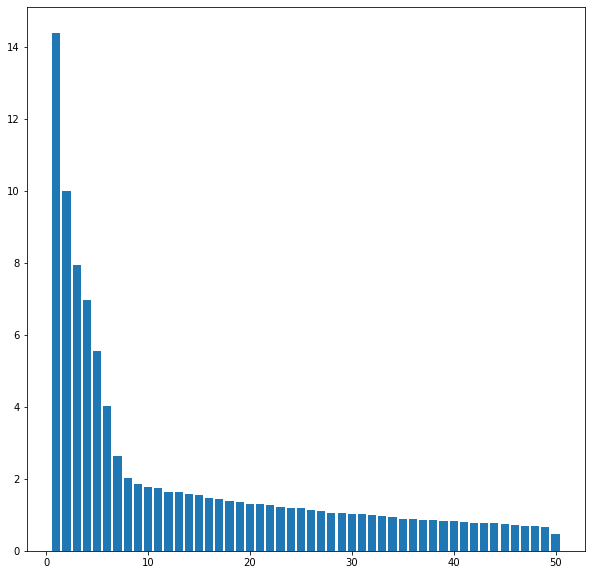

In [26]:
# Check how much variance is explained by each principal component
variances = principal.explained_variance_ratio_
# print(principal.explained_variance_ratio_)
plt.figure(figsize=(10,10))
plt.bar(x=[i for i in range(1, len(variances) + 1)],
        height=[i*100 for i in variances])